In [38]:
import os
import numpy as np
import pandas as pd
import pylab as pl 

from astropy.table import Table
from not_bright import not_bright

from selection.gdrops import gdrops
from selection.g_nondetect import g_nondetect
from selection.u_nondetect import u_nondetect

from uniform_magpriority import uniform_magpriority

from datamodel import datamodel

In [39]:
# Safeguard, but should be unncessary. 
np.random.seed(seed=314)

# Area in g band (approx); [sq. deg.]
cosmos_garea = 7.84

# Load latest clauds catalog.
cat = Table.read('/global/cscratch1/sd/mjwilson/clauds/March2021/COSMOS_v9_v210225.fits')

print('Latest COSMOS catalog has {} sources.'.format(len(cat)))

# Limit to no stellar mask. 
cat = cat[cat['MASK'] == 0]

print('After stellar masking, COSMOS catalog has {} sources.'.format(len(cat)))

# Limit to the hsc imaging footprint. Table A1 of https://www.overleaf.com/read/wdtmwbwvnjgc.
cat = cat[cat['FLAG_FIELD_BINARY'][:,0] == True]

print('After limiting to the g imaging, COSMOS catalog has {} sources.'.format(len(cat)))

# Fainter than 17th mag in ugrizy. 
isin = not_bright(cat)

cat = cat[isin]

print('After removing bright sources, COSMOS catalog has {} sources.'.format(len(cat)))

Latest COSMOS catalog has 5263013 sources.
After stellar masking, COSMOS catalog has 4426066 sources.
After limiting to the g imaging, COSMOS catalog has 3696114 sources.
Excluding 114 bright source in u [10.29, 16.99].
Excluding 137 bright source in g [10.98, 17.00].
Excluding 213 bright source in r [13.53, 17.00].
Excluding 441 bright source in i [12.82, 17.00].
Excluding 892 bright source in z [12.32, 17.00].
Excluding 1393 bright source in y [12.05, 17.00].
Excluding a total of 1530 bright source.
After removing bright sources, COSMOS catalog has 3694584 sources.


In [40]:
is_gdrop = gdrops(cat)

In [41]:
cat = cat[~is_gdrop]

In [42]:
cat = cat[cat['g'] < -40.]
cat = cat[cat['i'] > 22.5]
cat = cat[cat['i'] < 25.5]
cat = cat[cat['i_err'] <= 0.2]

In [43]:
cat.pprint()

   ID           RA                DEC         TRACT ... VMAX_r VMAX_i VMAX_Ks
------- ------------------ ------------------ ----- ... ------ ------ -------
   1038  149.4796497478579   2.89755292866609 10054 ...    0.0    0.0     0.0
   1104  149.5303635331854  2.898832194731732 10054 ...    0.0    0.0     0.0
   1132 149.53805773348503 2.8990113410877014 10054 ...    0.0    0.0     0.0
   1157 149.54342141209813 2.8990805756311464 10054 ...    0.0    0.0     0.0
   1220 149.57478236192875 2.8998946845117337 10054 ...    0.0    0.0     0.0
   1324  149.5546476309941  2.899404163434983 10054 ...    0.0    0.0     0.0
   3431  149.5727626274059   2.93040155940958 10054 ...    0.0    0.0     0.0
  13932 149.47932239748008  3.047279197811408 10054 ...    0.0    0.0     0.0
  14788 149.51715997658272 3.0779190096874123 10054 ...    0.0    0.0     0.0
  15725 149.55150769405358 3.0875237287161674 10054 ...    0.0    0.0     0.0
    ...                ...                ...   ... ...    ...  

In [44]:
ugr_drops = cat[cat['r'] < 0.0]

In [45]:
ugr_drops.pprint()

   ID           RA                DEC         TRACT ... VMAX_r VMAX_i VMAX_Ks
------- ------------------ ------------------ ----- ... ------ ------ -------
   1038  149.4796497478579   2.89755292866609 10054 ...    0.0    0.0     0.0
   1132 149.53805773348503 2.8990113410877014 10054 ...    0.0    0.0     0.0
   1157 149.54342141209813 2.8990805756311464 10054 ...    0.0    0.0     0.0
   1220 149.57478236192875 2.8998946845117337 10054 ...    0.0    0.0     0.0
 135835 149.37825394952222  3.419666271558243 10054 ...    0.0    0.0     0.0
 136457 149.37802760709002  3.419185820645544 10054 ...    0.0    0.0     0.0
 137379   149.394543415093   3.43965850659574 10054 ...    0.0    0.0     0.0
 140958  149.2775033939365   3.47789440273558 10054 ...    0.0    0.0     0.0
 153200 149.26092387516627  3.614050174345013 10054 ...    0.0    0.0     0.0
 153317  149.2516281063357 3.6077319613005705 10054 ...    0.0    0.0     0.0
    ...                ...                ...   ... ...    ...  

Text(0, 0.5, 'Counts per $\\Delta z$=0.05')

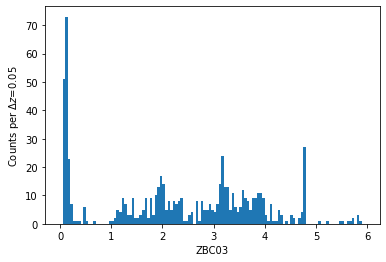

In [46]:
_ = pl.hist(ugr_drops['Z_BC03'], bins=np.arange(0.0, 6.0, 0.05))
pl.xlabel('ZBC03')
pl.ylabel('Counts per $\Delta z$=0.05')

In [88]:
ug_drops = cat[cat['r'] > 0.0]

In [89]:
ug_drops.pprint()

   ID           RA                DEC         TRACT ... VMAX_r VMAX_i VMAX_Ks
------- ------------------ ------------------ ----- ... ------ ------ -------
   1104  149.5303635331854  2.898832194731732 10054 ...    0.0    0.0     0.0
   1324  149.5546476309941  2.899404163434983 10054 ...    0.0    0.0     0.0
   3431  149.5727626274059   2.93040155940958 10054 ...    0.0    0.0     0.0
  13932 149.47932239748008  3.047279197811408 10054 ...    0.0    0.0     0.0
  14788 149.51715997658272 3.0779190096874123 10054 ...    0.0    0.0     0.0
  15725 149.55150769405358 3.0875237287161674 10054 ...    0.0    0.0     0.0
  16366 149.58593678713308 3.0933257068110582 10054 ...    0.0    0.0     0.0
  16465  149.5619444747661  3.094946079590013 10054 ...    0.0    0.0     0.0
  16555 149.47240242014735 3.0958854812111767 10054 ...    0.0    0.0     0.0
  18811  149.4346568936955  3.118136444664425 10054 ...    0.0    0.0     0.0
    ...                ...                ...   ... ...    ...  

Text(0, 0.5, 'r-i')

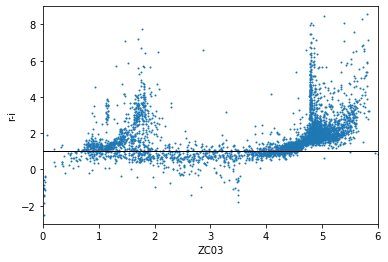

In [90]:
pl.plot(ug_drops['Z_BC03'], ug_drops['r'] - ug_drops['i'], marker='.', lw=0.0, markersize=2)
pl.axhline(1.0, lw=1., c='k')
pl.xlim(0.0, 6.0)
pl.ylim(-3., 9.)
pl.xlabel('ZC03')
pl.ylabel('r-i')

In [96]:
ug_drops = ug_drops[(ug_drops['r'] - ug_drops['i']) < 1.0]

In [97]:
ug_drops.pprint()

   ID           RA                DEC         TRACT ... VMAX_r VMAX_i VMAX_Ks
------- ------------------ ------------------ ----- ... ------ ------ -------
  13932 149.47932239748008  3.047279197811408 10054 ...    0.0    0.0     0.0
  16465  149.5619444747661  3.094946079590013 10054 ...    0.0    0.0     0.0
  20180  149.4544755269151  3.131574793363221 10054 ...    0.0    0.0     0.0
  36758 149.44493818013018 3.2925017616535786 10054 ...    0.0    0.0     0.0
  54189  149.5204370479579 3.4660222059470955 10054 ...    0.0    0.0     0.0
  55069 149.49355091952486 3.4756332647189216 10054 ...    0.0    0.0     0.0
  56174 149.58865827124825 3.4881469727924013 10054 ...    0.0    0.0     0.0
  56318 149.46742497705026 3.4899061771627213 10054 ...    0.0    0.0     0.0
  59995 149.52136635571878  3.531739352353614 10054 ...    0.0    0.0     0.0
  63505 149.42175914337665  3.619960216259096 10054 ...    0.0    0.0     0.0
    ...                ...                ...   ... ...    ...  

In [98]:
np.mean(ug_drops['Z_BC03'] < 1.5)

0.18523676880222842

In [99]:
interlopers = ug_drops[ug_drops['Z_BC03'] < 1.5]

In [100]:
interlopers.pprint()

   ID           RA                DEC         TRACT ... VMAX_r VMAX_i VMAX_Ks
------- ------------------ ------------------ ----- ... ------ ------ -------
  56318 149.46742497705026 3.4899061771627213 10054 ...    0.0    0.0     0.0
  66027 149.55951764056195  3.592809380983006 10054 ...    0.0    0.0     0.0
  69696  149.5650655386416  3.640519728190521 10054 ...    0.0    0.0     0.0
  80703 149.27600757399966  2.891551550464332 10054 ...    0.0    0.0     0.0
  94191 149.34388510476106 3.0310019672605395 10054 ...    0.0    0.0     0.0
 117021 149.38196578177445 3.2317154456631108 10054 ...    0.0    0.0     0.0
 149944 149.40234253365972  3.603897311065991 10054 ...    0.0    0.0     0.0
 158400  149.2655315406757   3.69112552615553 10054 ...    0.0    0.0     0.0
 181609 149.16531247755842  3.066995522195112 10054 ...    0.0    0.0     0.0
 181821 149.16268246837402  3.062438579920413 10054 ...    0.0    0.0     0.0
    ...                ...                ...   ... ...    ...  

# Done.